In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math

W0202 14:59:27.167216 4440208832 deprecation.py:323] From <ipython-input-2-c9761188bec5>:9: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0202 14:59:27.168104 4440208832 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0202 14:59:27.168857 4440208832 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will 

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz


W0202 14:59:27.387233 4440208832 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting ./mnist/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000,)


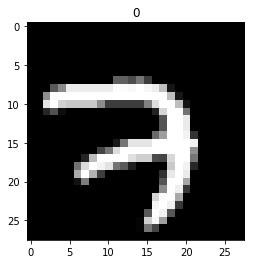

In [2]:
tf.set_random_seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR = 0.002         # learning rate
N_TEST_IMG = 5

# Mnist digits
mnist = input_data.read_data_sets('./mnist', one_hot=False)     # use not one-hotted target data
test_x = mnist.test.images[:200]
test_y = mnist.test.labels[:200]

# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)     # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()

In [3]:
# tf placeholder
tf_x = tf.placeholder(tf.float32, [None, 28*28])    # value in the range of (0, 1)

# encoder
en0 = tf.layers.dense(tf_x, 128, tf.nn.tanh)
en1 = tf.layers.dense(en0, 64, tf.nn.tanh)
en2 = tf.layers.dense(en1, 12, tf.nn.tanh)
encoded = tf.layers.dense(en2, 2)

# decoder
de0 = tf.layers.dense(encoded, 12, tf.nn.tanh)
de1 = tf.layers.dense(de0, 64, tf.nn.tanh)
de2 = tf.layers.dense(de1, 128, tf.nn.tanh)
decoded = tf.layers.dense(de2, 28*28, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

W0202 14:59:27.637967 4440208832 deprecation.py:323] From <ipython-input-3-79e3c60d0dd8>:5: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0202 14:59:27.641283 4440208832 deprecation.py:506] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1253: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0202 14:59:27.797596 4440208832 deprecation.py:506] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/training/slot_creator.py:187: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Ca

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

train loss: 0.2326


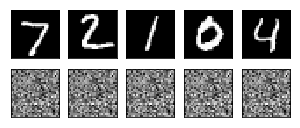

train loss: 0.0698


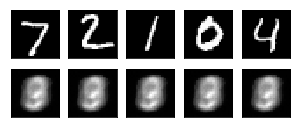

train loss: 0.0706


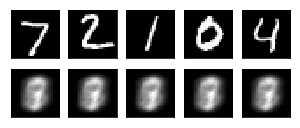

train loss: 0.0619


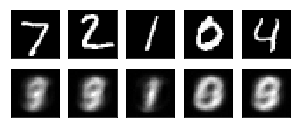

train loss: 0.0618


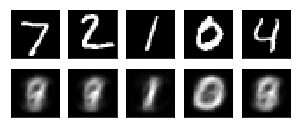

train loss: 0.0601


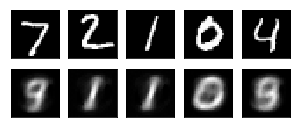

train loss: 0.0588


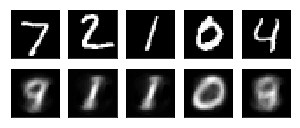

train loss: 0.0583


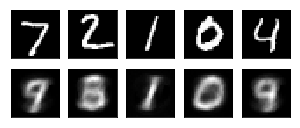

train loss: 0.0573


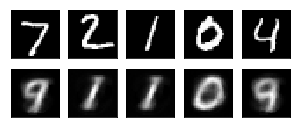

train loss: 0.0553


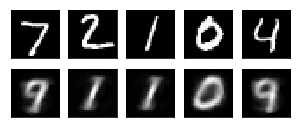

train loss: 0.0553


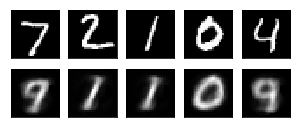

train loss: 0.0566


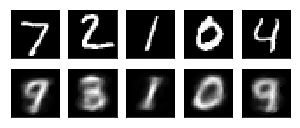

train loss: 0.0497


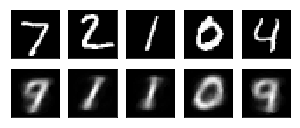

train loss: 0.0531


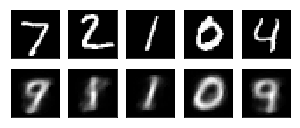

train loss: 0.0517


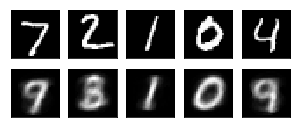

train loss: 0.0502


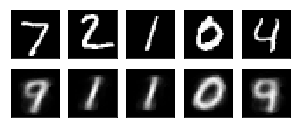

train loss: 0.0521


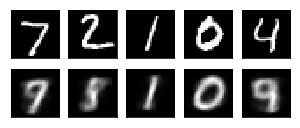

train loss: 0.0501


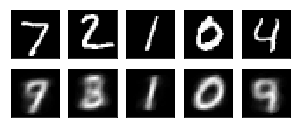

train loss: 0.0512


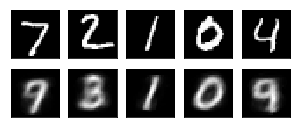

train loss: 0.0511


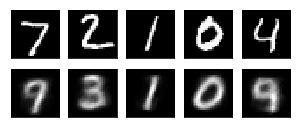

train loss: 0.0484


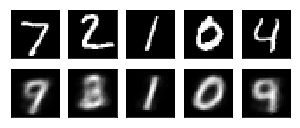

train loss: 0.0476


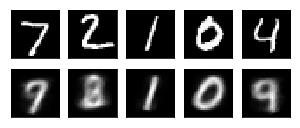

train loss: 0.0479


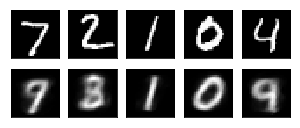

train loss: 0.0517


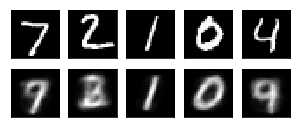

train loss: 0.0445


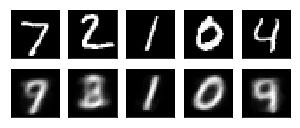

train loss: 0.0493


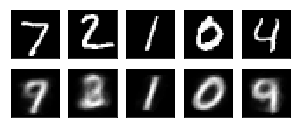

train loss: 0.0465


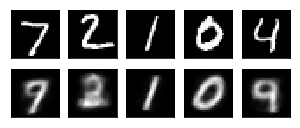

train loss: 0.0476


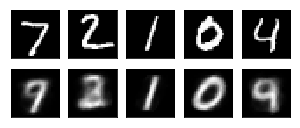

train loss: 0.0509


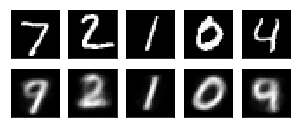

train loss: 0.0493


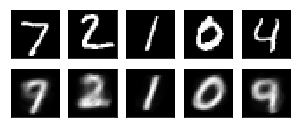

train loss: 0.0488


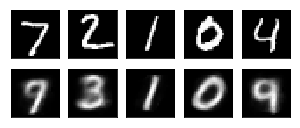

train loss: 0.0468


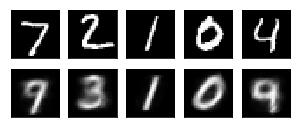

train loss: 0.0475


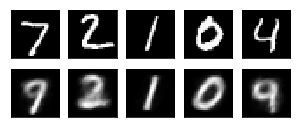

train loss: 0.0494


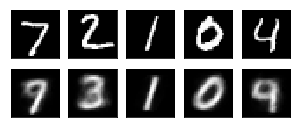

train loss: 0.0447


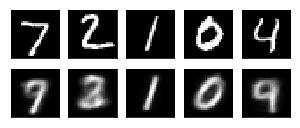

train loss: 0.0463


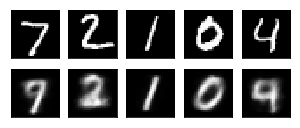

train loss: 0.0488


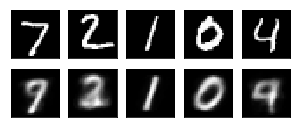

train loss: 0.0477


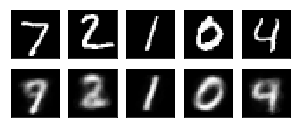

train loss: 0.0471


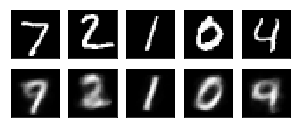

train loss: 0.0434


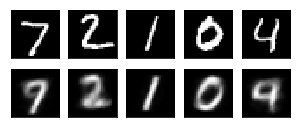

train loss: 0.0451


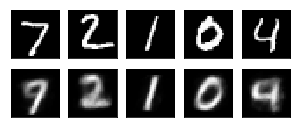

train loss: 0.0450


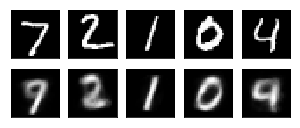

train loss: 0.0455


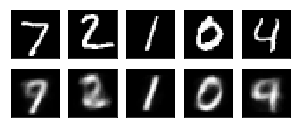

train loss: 0.0444


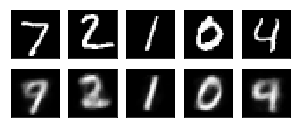

train loss: 0.0471


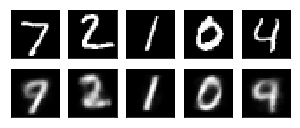

train loss: 0.0444


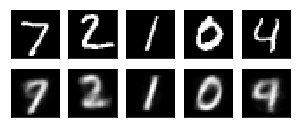

train loss: 0.0435


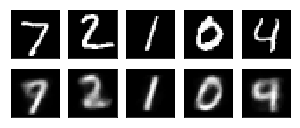

train loss: 0.0443


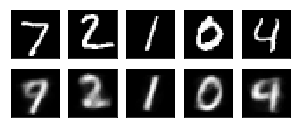

train loss: 0.0464


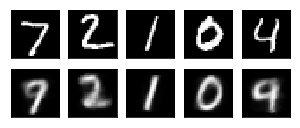

train loss: 0.0446


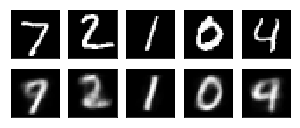

train loss: 0.0429


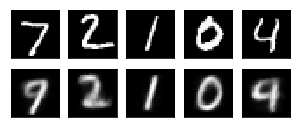

train loss: 0.0434


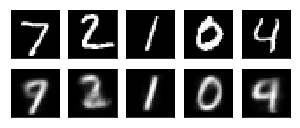

train loss: 0.0441


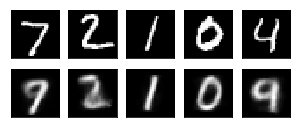

train loss: 0.0395


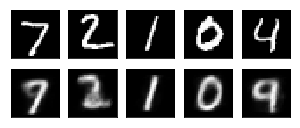

train loss: 0.0454


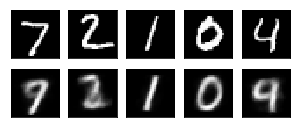

train loss: 0.0411


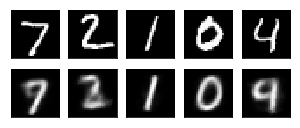

train loss: 0.0422


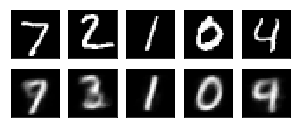

train loss: 0.0443


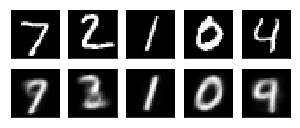

train loss: 0.0414


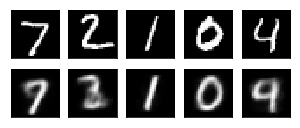

train loss: 0.0418


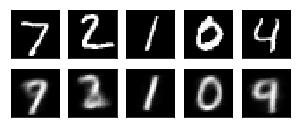

train loss: 0.0437


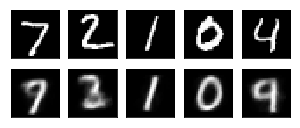

train loss: 0.0419


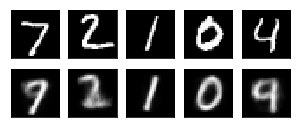

train loss: 0.0429


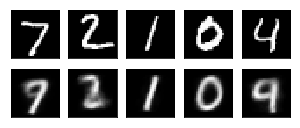

train loss: 0.0433


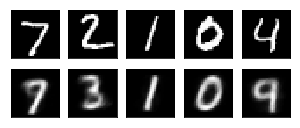

train loss: 0.0418


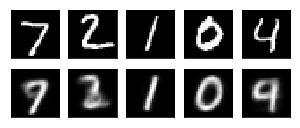

train loss: 0.0370


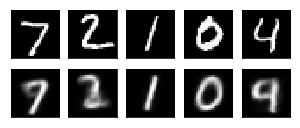

train loss: 0.0404


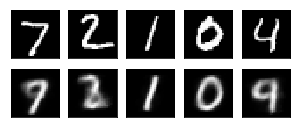

train loss: 0.0414


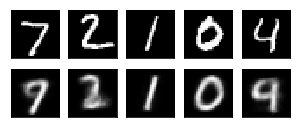

train loss: 0.0411


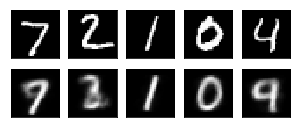

train loss: 0.0408


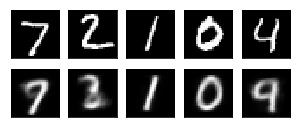

train loss: 0.0421


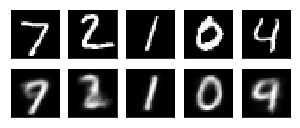

train loss: 0.0366


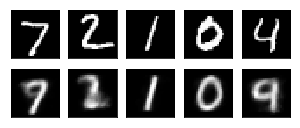

train loss: 0.0421


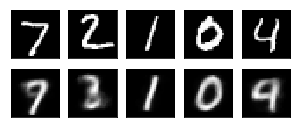

train loss: 0.0417


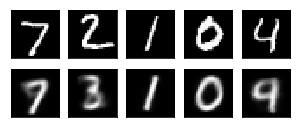

train loss: 0.0405


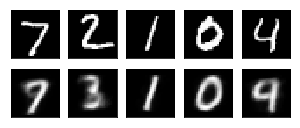

train loss: 0.0404


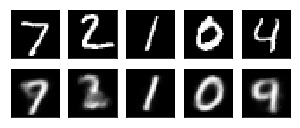

train loss: 0.0416


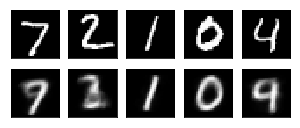

train loss: 0.0366


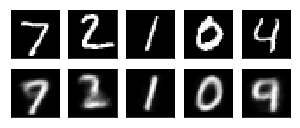

train loss: 0.0435


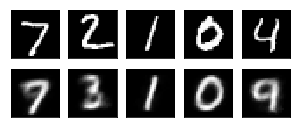

train loss: 0.0370


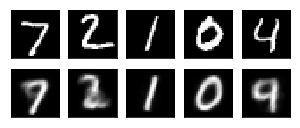

In [5]:
# initialize figure
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = mnist.test.images[:N_TEST_IMG]

for step in range(8000):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

    if step % 100 == 0:     # plotting
        print('train loss: %.4f' % loss_)
        # plotting decoded image (second row)
        decoded_data = sess.run(decoded, {tf_x: view_data})
        f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
        for i in range(N_TEST_IMG):
            a[0][i].imshow(np.reshape(view_data[i], (28, 28)), cmap='gray')
            a[0][i].set_xticks(()); a[0][i].set_yticks(())
            a[1][i].clear()
            a[1][i].imshow(np.reshape(decoded_data[i], (28, 28)), cmap='gray')
            a[1][i].set_xticks(()); a[1][i].set_yticks(())
        plt.draw(); plt.pause(0.01)
        
plt.ioff()

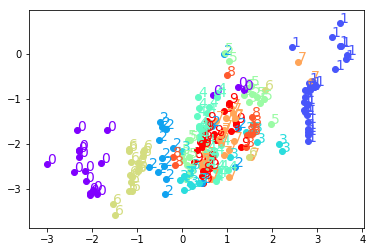

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# visualize in 3D plot
# view_data = test_x[:200]
# encoded_data = sess.run(encoded, {tf_x: view_data})
# fig = plt.figure(2); ax = Axes3D(fig)
# X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
# for x, y, z, s in zip(X, Y, Z, test_y):
#     c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
# ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
# plt.show()

view_data = test_x[:200]
encoded_data = sess.run(encoded, {tf_x: view_data})
X, Y = encoded_data[:, 0], encoded_data[:, 1]

for x, y, s in zip(X, Y, test_y):
    c = cm.rainbow(int(255*s/9)); 
    plt.scatter(x, y, c=[c])
    plt.text(x, y, s, fontdict={'size': 14, 'color':c})

plt.show()

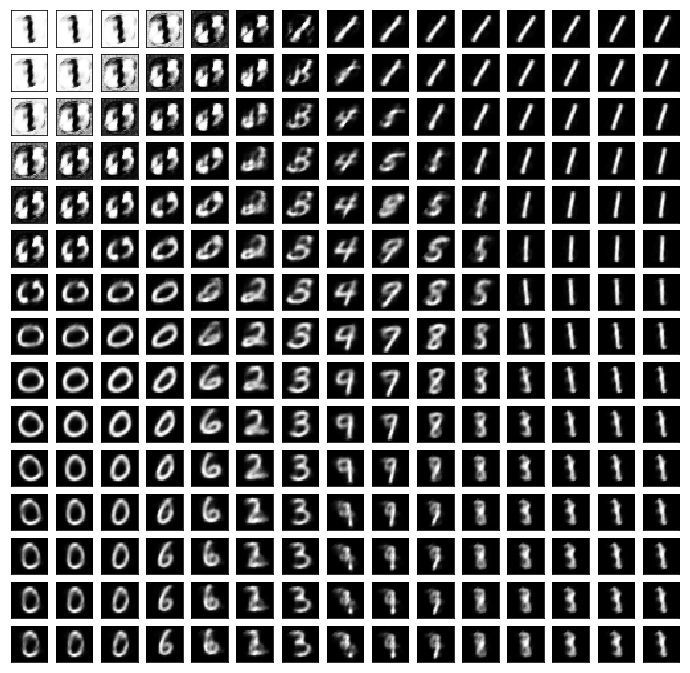

In [7]:
length = 15
x_lins = np.linspace(-3,4,length, dtype=np.float32)
y_lins = np.linspace(-4,1,length, dtype=np.float32)
data_draw = np.vstack([np.hstack((x_lins[:,np.newaxis], np.ones([length, 1])*y_lins[length-1-i])) for i in range(length)])
draw_ = sess.run(decoded, feed_dict={encoded:data_draw})
    
num = length*length
row = int(math.ceil(num/length))
fig, axes = plt.subplots(row, length, figsize=(length*(12/length), row*(12/length)))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(draw_[i],[28,28]), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

(256, 256)


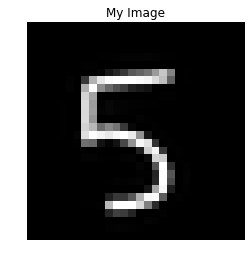

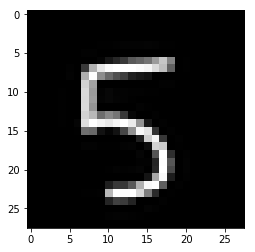

In [8]:
from PIL import Image
im = Image.open("./my_image1.png")
print(np.array(im).shape)

im = im.resize((28, 28), Image.ANTIALIAS) #resize the image
im = np.array(im) #convert to an array
im2 = im/np.max(im).astype(float) #normalise input

plt.imshow(im2, cmap='gray')
plt.title('My Image')
plt.axis('off')
plt.show()

test_image = np.reshape(im2, [1,784]) # reshape it to our input placeholder shape

d_ = sess.run(decoded, feed_dict={tf_x:test_image})

plt.imshow(np.reshape(test_image, (28, 28)), cmap='gray')